In [ ]:
#En este primer paso vamos a importar las librerias necesarias para hacer la exploración de datos
import pandas as pd
import numpy as np
import random
import requests

In [ ]:
import json

data = {"username":"danielyepesmesa","key":"84aa2288a3d961af65fb22e9ccda4433"}
with open('kaggle.json', 'w') as file:
    json.dump(data, file, indent=4)


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download forest-cover-type-prediction

forest-cover-type-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#En este paso vamos extraer el CSV que contiene el dataset
!unzip forest-cover-type-prediction.zip

Archive:  forest-cover-type-prediction.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sampleSubmission.csv    
replace sampleSubmission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace sampleSubmission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sampleSubmission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: test3.csv               
  inflating: train.csv               
  inflating: train.csv.zip           


In [ ]:
df = pd.read_csv("train.csv")
df.head(100)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2860,31,10,295,98,3644,218,218,135,...,0,0,0,0,0,0,0,0,0,1
96,97,3067,164,11,85,7,6811,230,243,144,...,0,0,0,0,0,0,0,0,0,2
97,98,2804,72,5,543,61,3115,225,231,141,...,0,0,0,0,0,0,0,0,0,2
98,99,2562,59,3,0,0,1116,221,233,148,...,0,0,0,0,0,0,0,0,0,2


**1. Preparacion de datos**

In [ ]:
#Preparamos el dataset para cumplir con los requisitos del problema

df_forest = df.copy()

from random import randrange

porcentaje = 6

n_filas, n_columnas = df.shape
numero_nans = (n_filas*n_columnas*porcentaje)//100  # // es la división entera

for i in range(numero_nans):
  fila = randrange(0, n_filas)
  columna = randrange(1, n_columnas-1)
  df_forest.iloc[fila, columna] = float("nan")


In [ ]:
df_forest.head(20)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2,2590.0,56.0,2.0,212.0,-6.0,390.0,NaN,235.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,3,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,4,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,5
5,6,2579.0,132.0,6.0,NaN,-15.0,67.0,230.0,237.0,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,7,NaN,45.0,7.0,270.0,5.0,NaN,222.0,225.0,138.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,5
7,8,2605.0,49.0,4.0,234.0,7.0,573.0,222.0,230.0,144.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,5
8,9,2617.0,45.0,9.0,240.0,56.0,666.0,223.0,221.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
9,10,2612.0,59.0,10.0,247.0,11.0,636.0,228.0,219.0,124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


Inicia la preparacion de datos para el entendimiento y agrupacion del dataset

In [ ]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

**Analizando los tipos de columnas** 

podemos determinar que las columnas desde la #2 a la numero #11 ambas incluidas, son datos numericos aleatorios, donde algunos son, Alturas en metros, Distancias en metros, y grados de inclinacion

Apartir de la columna #12 a la #55 son datos que se pueden interpretar como booleanos, pues estos datos son 0 ó 1

Comenzamos con la preparacion de el dataset mostrando si existen datos faltantes y su cantidad

In [ ]:
check_for_any_nan= df_forest.isna().any().any()#Vamos a encontrar cuantos valores NaN existen en nuestro dataframe
total_nan_values = df_forest.isna().sum().sum()#Vamos a sumar el total de valores NaN presentes en el dataframe
fil ,col = df_forest.shape
num_datos = fil*col
print("Existen valores en NaN: "+str(check_for_any_nan))
print("Total de valores en NaN: "+str(total_nan_values))
print("El porcentaje de valores NaN: " +str((total_nan_values*100)/num_datos) + "%")

Existen valores en NaN: True
Total de valores en NaN: 49262
El porcentaje de valores NaN: 5.817979969765684%


Analizamos el numero de datos faltantes por columna

In [ ]:
df_forest.isnull().sum()

Id                                      0
Elevation                             894
Aspect                                930
Slope                                 903
Horizontal_Distance_To_Hydrology      881
Vertical_Distance_To_Hydrology        938
Horizontal_Distance_To_Roadways       930
Hillshade_9am                         977
Hillshade_Noon                        948
Hillshade_3pm                         912
Horizontal_Distance_To_Fire_Points    883
Wilderness_Area1                      923
Wilderness_Area2                      910
Wilderness_Area3                      895
Wilderness_Area4                      900
Soil_Type1                            918
Soil_Type2                            895
Soil_Type3                            929
Soil_Type4                            908
Soil_Type5                            894
Soil_Type6                            874
Soil_Type7                            933
Soil_Type8                            947
Soil_Type9                        

Eliminamos las filas con datos faltantes para sacar promedios

In [ ]:
data_forest = df_forest.dropna() #eliminamos todas las columnas con valores en NaN
data_forest.isnull().sum() #Verificamos si las silas en NaA fueron eliminadas

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


Sacamos los promedios de las columnas de la #2 a la #11

In [ ]:
means_vector = data_forest.iloc[:,[1,2,3,4,5,6,7,8,9,10]].mean().round(1).to_list()
means_vector

[2780.4, 161.4, 16.0, 247.4, 54.2, 1725.6, 210.1, 220.1, 139.9, 1551.7]

Separamos las columnas que vamos a utilizar en funcion del tipo de dato que necesitamos remplazar

In [ ]:
columns_means = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", 
                 "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
columns_bool = ["Wilderness_Area1" ,"Wilderness_Area2" ,"Wilderness_Area3" ,"Wilderness_Area4" ,"Soil_Type1" ,"Soil_Type2" ,"Soil_Type3" ,
                "Soil_Type4" ,"Soil_Type5" ,"Soil_Type6" ,"Soil_Type7" ,"Soil_Type8" ,"Soil_Type9" ,"Soil_Type10" ,"Soil_Type11" ,"Soil_Type12" ,"Soil_Type13" ,
                "Soil_Type14" ,"Soil_Type15" ,"Soil_Type16" ,"Soil_Type17" ,"Soil_Type18" ,"Soil_Type19" ,"Soil_Type20" ,"Soil_Type21" ,"Soil_Type22" ,
                "Soil_Type23" ,"Soil_Type24" ,"Soil_Type25" ,"Soil_Type26" ,"Soil_Type27" ,"Soil_Type28" ,"Soil_Type29" ,"Soil_Type30" ,"Soil_Type31" ,
                "Soil_Type32" ,"Soil_Type33" ,"Soil_Type34" ,"Soil_Type35" ,"Soil_Type36" ,"Soil_Type37" ,"Soil_Type38" ,"Soil_Type39" ,"Soil_Type40"]

llenamos los NaN con los valores correspondientes, sea un valor booleano o un promedio

In [ ]:
aux = 0

for column in columns_means:
  df_forest[column].fillna(value=means_vector[aux], inplace=True)
  aux += 1


for column in columns_bool:
  df_forest[column].fillna(value=random.randint(0,1), inplace=True)

Verificamos que los valores NaN fueron cambiados segun cada caso

In [ ]:
df_forest.head(100)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2,2590.0,56.0,2.0,212.0,-6.0,390.0,210.1,235.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,3,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,4,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2860.0,31.0,10.0,295.0,98.0,3644.0,218.0,218.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
96,97,3067.0,164.0,11.0,85.0,7.0,6811.0,230.0,243.0,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
97,98,2804.0,72.0,5.0,543.0,61.0,3115.0,225.0,231.0,141.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
98,99,2562.0,59.0,3.0,0.0,0.0,1116.0,221.0,233.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


**2. Empezamos el analisis de los datos y el entramiento del modelo**

Apartir de ahora nuestro DF principal sera el df_forest


a) observamos la informacion general del dataset

In [ ]:
#En este paso vamos a poder observar toda la información relacionada al dataframe que hemos cargado

df_forest.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  15120 non-null  int64  
 1   Elevation                           15120 non-null  float64
 2   Aspect                              15120 non-null  float64
 3   Slope                               15120 non-null  float64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  float64
 5   Vertical_Distance_To_Hydrology      15120 non-null  float64
 6   Horizontal_Distance_To_Roadways     15120 non-null  float64
 7   Hillshade_9am                       15120 non-null  float64
 8   Hillshade_Noon                      15120 non-null  float64
 9   Hillshade_3pm                       15120 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  float64
 11  Wilderness_Area1                    15120

b) realizamos el histograma de el dataset para entender como estan agrupados.

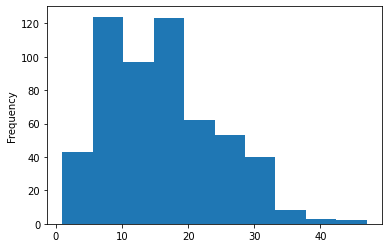

In [ ]:
data_forest['Slope'].plot(kind = "hist")

c) Vemos la relacion de las columnas con respecto a el Cover_Type

In [ ]:
abs(df_forest.corr()['Cover_Type'].sort_values(ascending=False))

Cover_Type                            1.000000
Soil_Type39                           0.231950
Soil_Type38                           0.168184
Wilderness_Area3                      0.113913
Id                                    0.108363
Soil_Type40                           0.108299
Soil_Type35                           0.107642
Soil_Type10                           0.105645
Slope                                 0.085383
Vertical_Distance_To_Hydrology        0.072129
Wilderness_Area4                      0.071104
Soil_Type17                           0.043009
Soil_Type2                            0.020761
Soil_Type37                           0.018853
Elevation                             0.017402
Soil_Type13                           0.017182
Soil_Type14                           0.016470
Soil_Type1                            0.014960
Soil_Type16                           0.008679
Soil_Type11                           0.008483
Soil_Type36                           0.007041
Soil_Type18  

In [ ]:
x=df_forest.drop(["Id","Cover_Type"],axis=1)
y=df_forest['Cover_Type']

Inicamos el entrenamiento del modelo, lo realizamos cargando las librerias pertinentes

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

Queremos determinar cual es el modelo mas apropiado para realizar nuestros entrenamientos

Metodo GaussianoNB

In [ ]:
def classification_gs(df_forest,y):
  
    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


    predict=GaussianNB().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_gs(x,y)

(0.6025132275132276,
 0.6025132275132276,
 0.6025132275132276,
 0.6025132275132276)

Metodo Bernoulli

In [ ]:
def classification_bn(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


    predict=BernoulliNB().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_bn(x,y)

(0.5373677248677249,
 0.5373677248677249,
 0.5373677248677249,
 0.5373677248677249)

Metodo de KNeigbors

In [ ]:
def classification_kn(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


    predict=KNeighborsClassifier().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_kn(x,y)

(0.734457671957672, 0.734457671957672, 0.734457671957672, 0.734457671957672)

In [ ]:
def classification_svc(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


    predict=SVC().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_svc(x,y)

(0.5902777777777778,
 0.5902777777777778,
 0.5902777777777778,
 0.5902777777777778)

Metodo DecisionTree

In [ ]:

def classification_dTree(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


    predict=DecisionTreeClassifier().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_dTree(x,y)

(0.7238756613756614,
 0.7238756613756614,
 0.7238756613756614,
 0.7238756613756613)

Metodo de LogisticRegr

In [ ]:
def classification_lRegr(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

    predict=LogisticRegression().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_lRegr(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(0.45965608465608465,
 0.45965608465608465,
 0.45965608465608465,
 0.45965608465608465)

Metodo de GradientBoosting

In [ ]:

def classification_graBoosting(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

    predict=GradientBoostingClassifier().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_graBoosting(x,y)

(0.7671957671957672,
 0.7671957671957672,
 0.7671957671957672,
 0.7671957671957672)

metodo de RandomForest

In [ ]:
def classification_ramForest(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

    predict=RandomForestClassifier().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_ramForest(x,y)

(0.8224206349206349, 0.8224206349206349, 0.8224206349206349, 0.822420634920635)

Usamos un modelo no supervisado, para analizar los Cover_Types

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


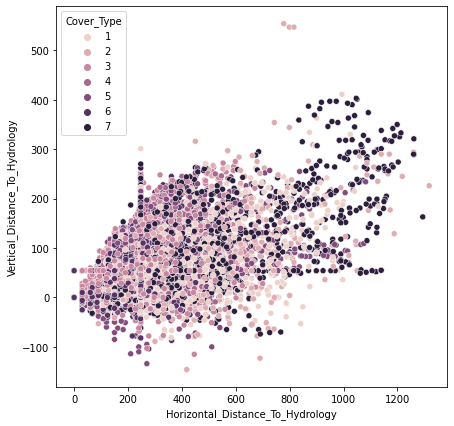

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7,7))
sns.scatterplot("Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",hue = "Cover_Type",data = df_forest)

Tenemos 3 metodos que nos dan mayor precisión para el entrenamiento de el modelo

In [ ]:
top3Metods = pd.DataFrame(columns=['Acurracy', 'Precision', 'Recall', 'F1'],index=['DecisionTree','GradientBoosting','RandomForest'])
dTree = classification_dTree(x,y)
top3Metods.Acurracy[0] = dTree[0]
top3Metods.Precision[0] = dTree[1]
top3Metods.Recall[0] = dTree[2]
top3Metods.F1[0] = dTree[3]

graBoosting = classification_graBoosting(x,y)
top3Metods.Acurracy[1] = graBoosting[0]
top3Metods.Precision[1] = graBoosting[1]
top3Metods.Recall[1] = graBoosting[2]
top3Metods.F1[1] = graBoosting[3]

RamForest = classification_ramForest(x,y)
top3Metods.Acurracy[2] = RamForest[0]
top3Metods.Precision[2] = RamForest[1]
top3Metods.Recall[2] = RamForest[2]
top3Metods.F1[2] = RamForest[3]


top3Metods.head()


,Acurracy,Precision,Recall,F1
DecisionTree,0.725198,0.725198,0.725198,0.725198
GradientBoosting,0.767196,0.767196,0.767196,0.767196
RandomForest,0.820106,0.820106,0.820106,0.820106


Como podemos observar el metodo de mayor precisión es el RandomForest, por lo tanto este sera nuestro modelo

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,random_state=70)

model = RandomForestClassifier(n_estimators=70)
model.fit(x_train,y_train)

model.score(x_test,y_test)*100

80.66137566137566

Importamos el dataset para testing

In [ ]:
df_test = pd.read_csv("test.csv")
df.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
submission= pd.DataFrame(data = predict,columns = ['Cover_Type'])
submission.head(100)

,Cover_Type
0,2
1,2
2,2
3,2
4,2
...,...
95,2
96,2
97,2
98,2


In [ ]:
submission['Id'] =df_test["Id"]
submission.set_index('Id',inplace=True)
submission.to_csv('submission.csv')